Jon Stingel
######This notebook is for importing GRF files for each subject and condition, and then using them to get step frequencies. Plotting step frequency for each of them. 

In [1]:
import os
import pandas as pd
import glob
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import scipy

%matplotlib inline
# pd.set_option('display.max_rows',None,'display.max_columns',None)

In [2]:
# import the experimental values
# set paths
repobasedir = os.getcwd()
grffilespath = os.path.join(repobasedir,'..\\expfiles\\fullgrffiles\\')
grffilelist = os.listdir(grffilespath)
print(grffilelist)


['welk001_welknatural_trial01grf_full.mot', 'welk001_welkexo_trial01grf_full.mot', 'welk002_welknatural_trial01grf_full.mot', 'welk002_welkexo_trial01grf_full.mot', 'welk003_welknatural_trial01grf_full.mot', 'welk003_welkexo_trial01grf_full.mot', 'welk004_welknatural_trial01grf_full.mot', 'welk004_welkexo_trial01grf_full.mot', 'welk007_welknatural_trial01grf_full.mot', 'welk007_welkexo_trial01grf_full.mot', 'welk008_welknatural_trial01grf_full.mot', 'welk008_welkexo_trial01grf_full.mot', 'welk009_welknatural_trial01grf_full.mot', 'welk009_welkexo_trial01grf_full.mot', 'welk010_welknatural_trial01grf_full.mot', 'welk010_welkexo_trial01grf_full.mot']


In [3]:
#
templist = []
temppeaklist = []
tempinteglist = []

for file in grffilelist:
    # get the key things from the GRF file
    temp = file.split('_')
#     tempsubj = file[0:7]
#     tempcond = file[8:22]
#     temptrial = file[23:-7]
#     tempexp = file[0:4]

    tempsubj = temp[0]
    tempcond = temp[1]
    temptrial = temp[2]
    tempexp = file[0:4]

    tempfile = os.path.join(grffilespath,file)
    # print(tempfile)
    tempdata = pd.read_csv(tempfile, skiprows=6, delimiter='\t')
    # select the data we want
    temptime = tempdata['time'].to_numpy().reshape(-1,1)
    grfy = tempdata['rF_y'].to_numpy().reshape(-1,1)
    
    peaks, _ = scipy.signal.find_peaks(grfy.flatten(), prominence=(100,None))
    timesflat = temptime.flatten()
    times = temptime[peaks]
    # get the number of peaks
    numsteps = len(peaks)-1
    starttime = temptime[peaks[0]]
    endtime = temptime[peaks[-1]]
    totaltime = endtime - starttime
    stridefreq = numsteps/totaltime
    
#     plt.plot(grfy.flatten())
#     plt.plot(peaks, grfy.flatten()[peaks],'x')
#     plt.plot(temptime.flatten())
#     plt.plot(peaks, temptime[peaks],'o')
#     plt.show()
    
    temp_df = pd.DataFrame({'subjectname':[tempsubj],
                           'condname':[tempcond],
                           'trialname':[temptrial],
                           'experimentname':[tempexp],
                           'grfy':[grfy],
                            'time':[temptime],
                           'stridefreq':[stridefreq]})
    
    templist.append(temp_df)
    
# end

# combine all the dataframes
stride_df = pd.concat(templist, ignore_index=True)
stride_df.sort_values(by=['subjectname','condname'],inplace=True)
print(stride_df)

    
    


   subjectname     condname   trialname experimentname  \
1      welk001      welkexo  trial01grf           welk   
0      welk001  welknatural  trial01grf           welk   
3      welk002      welkexo  trial01grf           welk   
2      welk002  welknatural  trial01grf           welk   
5      welk003      welkexo  trial01grf           welk   
4      welk003  welknatural  trial01grf           welk   
7      welk004      welkexo  trial01grf           welk   
6      welk004  welknatural  trial01grf           welk   
9      welk007      welkexo  trial01grf           welk   
8      welk007  welknatural  trial01grf           welk   
11     welk008      welkexo  trial01grf           welk   
10     welk008  welknatural  trial01grf           welk   
13     welk009      welkexo  trial01grf           welk   
12     welk009  welknatural  trial01grf           welk   
15     welk010      welkexo  trial01grf           welk   
14     welk010  welknatural  trial01grf           welk   

             

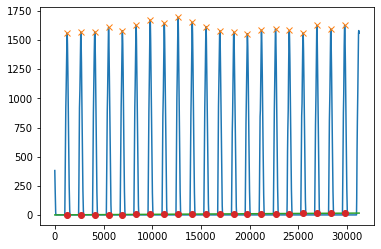

In [4]:
# print(len(grfy))
# print(len(temptime))
# print(grfy.shape)
# grfyreshape = grfy.reshape([1,len(grfy)])
# print(grfyreshape.shape)
# print(grfy.flatten().shape)
# testpeaks, _ = scipy.signal.find_peaks(grfy.flatten())
plt.plot(grfy.flatten())
plt.plot(peaks, grfy.flatten()[peaks],'x')
plt.plot(temptime.flatten())
plt.plot(peaks, temptime[peaks],'o')
plt.show()
# temptime.flatten()[testpeaks]
# numsteps = len(testpeaks)
# print(numsteps)
# testpeaks

In [5]:

# set up data
natural_steps = np.array(stride_df[stride_df['condname'] == 'welknatural']['stridefreq'])
exo_steps = np.array(stride_df[stride_df['condname'] == 'welkexo']['stridefreq'])


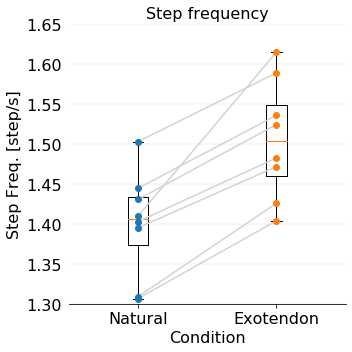

In [27]:
# figure out how to plot stride frequencies (percents or just each one)
# gotta be percents sincea everyone is different
fig, ax = plt.subplots(figsize=(5,5))

# remove borders except bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# set title
ax.set_title('Step frequency', fontsize=16)
ax.set_ylim([1.30,1.65])
ax.set_ylabel('Step Freq. [step/s]', fontsize=16)
ax.set_xlabel('Condition', fontsize=16)

ax.tick_params(axis='both', labelsize=16)

# set up the plotting data
dataset = [natural_steps, exo_steps]
labels = ['Natural','Exotendon']

# plot
for i in range(len(natural_steps)):
    tempnat = natural_steps[i]
    tempexo = exo_steps[i]
    ax.plot([1,2],[tempnat,tempexo],'lightgrey', zorder=2)

ax.boxplot(dataset, labels=labels, zorder=1)
ax.scatter(np.ones(len(natural_steps)), natural_steps, zorder=3)
ax.scatter(2*np.ones(len(exo_steps)), exo_steps, zorder=4)
plt.tight_layout()

plt.savefig(os.path.join(repobasedir,'..\\analysis\\stepfreq_boxplot_all.png'),
           dpi=300)
plt.show()

In [7]:
print(dataset)
print(natural_steps)
print(exo_steps)

[array([array([1.50320874]), array([1.43066337]), array([1.39522763]),
       array([1.44466194]), array([1.40293447]), array([1.30898292]),
       array([1.40999335]), array([1.3065064])], dtype=object), array([array([1.58915711]), array([1.52459461]), array([1.4718446]),
       array([1.53616314]), array([1.48275656]), array([1.42585747]),
       array([1.61525873]), array([1.4040014])], dtype=object)]
[array([1.50320874]) array([1.43066337]) array([1.39522763])
 array([1.44466194]) array([1.40293447]) array([1.30898292])
 array([1.40999335]) array([1.3065064])]
[array([1.58915711]) array([1.52459461]) array([1.4718446])
 array([1.53616314]) array([1.48275656]) array([1.42585747])
 array([1.61525873]) array([1.4040014])]


In [8]:
# make a plot for the older subjects for a comparison
# organize that data
# set up data
steps_old_1 = stride_df[stride_df['subjectname'] == 'welk001']
steps_old_2 = stride_df[stride_df['subjectname'] == 'welk002']
steps_old_3 = stride_df[stride_df['subjectname'] == 'welk003']
steps_old_4 = stride_df[stride_df['subjectname'] == 'welk004']
steps_old_combine = pd.concat([steps_old_1, steps_old_2, 
                               steps_old_3, steps_old_4],
                              axis=0)

# split conditions
natural_steps_old = np.array(steps_old_combine[steps_old_combine['condname'] == 'welknatural']['stridefreq'])
exo_steps_old = np.array(steps_old_combine[steps_old_combine['condname'] == 'welkexo']['stridefreq'])



# print(steps_old_combine)
# print(natural_steps_old)
# print(exo_steps_old)


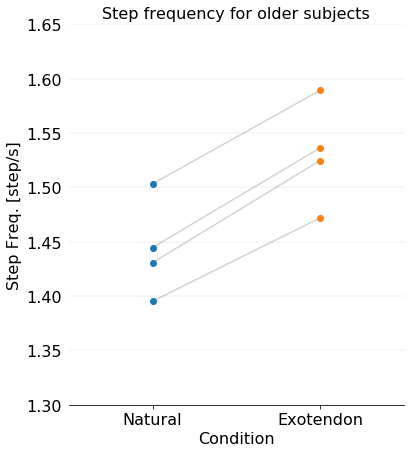

In [15]:
# figure out how to plot stride frequencies (percents or just each one)
# gotta be percents sincea everyone is different
fig, ax = plt.subplots(figsize=(6,7))

# remove borders except bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# set title
ax.set_title('Step frequency for older subjects', fontsize=16)
ax.set_ylim([1.30,1.65])
ax.set_xlim([0.5,2.5])
ax.set_ylabel('Step Freq. [step/s]', fontsize=16)
ax.set_xlabel('Condition', fontsize=16)

ax.tick_params(axis='both', labelsize=16)
ax.set_xticks([1,2])

# set up the plotting data
dataset = [natural_steps_old, exo_steps_old]
labels = ['Natural','Exotendon']
ax.set_xticklabels(labels)
# plot
# ax.boxplot(dataset, labels=labels)
ax.scatter(np.ones(len(natural_steps_old)), natural_steps_old, zorder=4)
ax.scatter(2*np.ones(len(exo_steps_old)), exo_steps_old, zorder=4)

for i in range(len(natural_steps_old)):
    tempnat = natural_steps_old[i]
    tempexo = exo_steps_old[i]
    ax.plot([1,2],[tempnat,tempexo],'lightgrey', zorder=1)

plt.savefig(os.path.join(repobasedir,'..\\analysis\\stepfreq_old.png'),
           dpi=300)
plt.show()

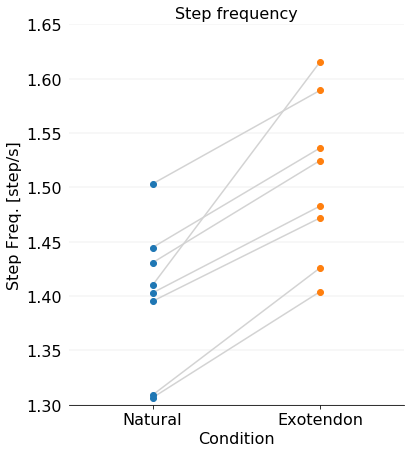

In [14]:
# figure out how to plot stride frequencies (percents or just each one)
# gotta be percents sincea everyone is different
fig, ax = plt.subplots(figsize=(6,7))

# remove borders except bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# set title
ax.set_title('Step frequency', fontsize=16)
ax.set_ylim([1.30,1.65])
ax.set_ylabel('Step Freq. [step/s]', fontsize=16)
ax.set_xlabel('Condition', fontsize=16)
ax.set_xlim([0.5,2.5])
ax.set_xticks([1,2])

ax.tick_params(axis='both', labelsize=16)

# set up the plotting data
dataset = [natural_steps_old, exo_steps_old]
labels = ['Natural','Exotendon']
ax.set_xticklabels(labels)
# plot
# ax.boxplot(dataset, labels=labels)
ax.scatter(np.ones(len(natural_steps)), natural_steps, zorder=4)
ax.scatter(2*np.ones(len(exo_steps)), exo_steps, zorder=4)

for i in range(len(natural_steps)):
    tempnat = natural_steps[i]
    tempexo = exo_steps[i]
    ax.plot([1,2],[tempnat,tempexo],'lightgrey', zorder=3)
    
plt.savefig(os.path.join(repobasedir,'..\\analysis\\stepfreq_all.png'),
           dpi=300)

plt.show()

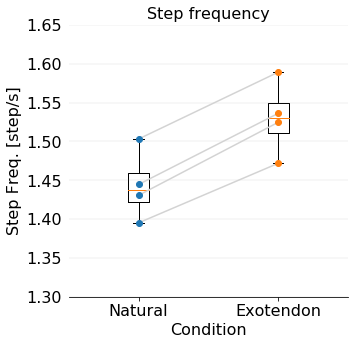

In [28]:
# figure out how to plot stride frequencies (percents or just each one)
# gotta be percents sincea everyone is different
fig, ax = plt.subplots(figsize=(5,5))

# remove borders except bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)

# set title
ax.set_title('Step frequency', fontsize=16)
ax.set_ylim([1.30,1.65])
ax.set_ylabel('Step Freq. [step/s]', fontsize=16)
ax.set_xlabel('Condition', fontsize=16)

ax.tick_params(axis='both', labelsize=16)

# set up the plotting data
dataset = [natural_steps_old, exo_steps_old]
labels = ['Natural','Exotendon']

# plot
for i in range(len(natural_steps_old)):
    tempnat = natural_steps_old[i]
    tempexo = exo_steps_old[i]
    ax.plot([1,2],[tempnat,tempexo],'lightgrey', zorder=2)

ax.boxplot(dataset, labels=labels, zorder=1)
ax.scatter(np.ones(len(natural_steps_old)), natural_steps_old, zorder=3)
ax.scatter(2*np.ones(len(exo_steps_old)), exo_steps_old, zorder=4)


plt.savefig(os.path.join(repobasedir,'..\\analysis\\stepfreq_boxplot_old.png'),
           dpi=300)
plt.show()

In [11]:
perc_change = (exo_steps - natural_steps)/natural_steps*100
perc_change_avg = np.mean(perc_change)
print(perc_change_avg)


[7.59335095]
